Optimal number of clusters: 3
Silhouette Score: 0.812990170087645
Training Data - Cluster Assignments: [0 0 0 ... 0 0 0]


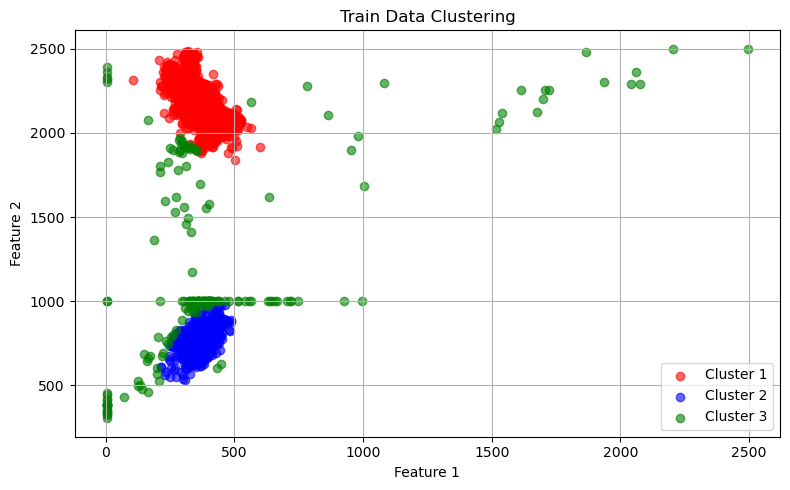

GMM model saved as 'gmm_model.pkl'.


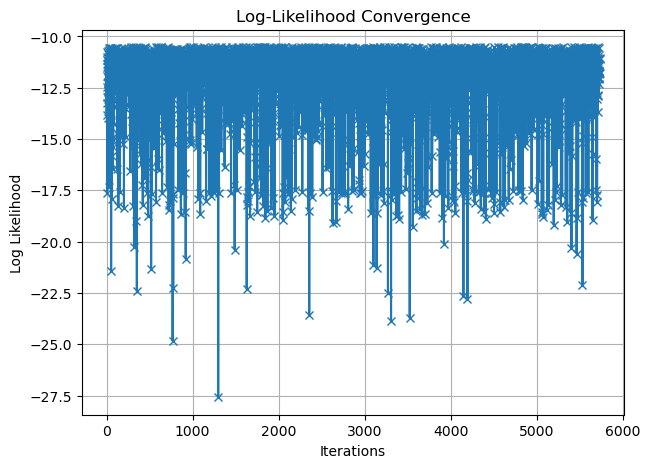

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import joblib

# Load datasets
class1 = pd.read_csv('desktop/internship/dataset/rd_group5/class1.txt', delimiter=' ', header=None)
class2 = pd.read_csv('desktop/internship/dataset/rd_group5/class2.txt', delimiter=' ', header=None)
class3 = pd.read_csv('desktop/internship/dataset/rd_group5/class3.txt', delimiter=' ', header=None)

# Combine datasets into a single array
data = np.vstack([class1.values, class2.values, class3.values])

# Handle missing values by replacing NaN with the mean of each column
imputer = SimpleImputer(strategy='mean')
data = imputer.fit_transform(data)

# Train-test split function
def train_test_split(data, test_size=0.2):
    test_count = int(len(data) * test_size)
    np.random.shuffle(data)
    test_data = data[:test_count]
    train_data = data[test_count:]
    return train_data, test_data

# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2)

# Determine optimal number of clusters using Elbow method (BIC)
scores = []
k_range = range(1, 4)
for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(train_data)
    scores.append(gmm.bic(train_data))  # Using BIC score for evaluation

# Automatically select optimal k based on BIC scores
optimal_k = k_range[np.argmin(scores)]
print(f'Optimal number of clusters: {optimal_k}')

# Fit GMM Model using optimal clusters
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm.fit(train_data)

# Predict cluster assignments for training data
train_clusters = gmm.predict(train_data)

# Calculate silhouette score for training data
silhouette_avg = silhouette_score(train_data, train_clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Plot clusters function
def plot_clusters(data, clusters, title):
    colors = ['red', 'blue', 'green', 'purple', 'orange']
    data = np.array(data)  
    
    # If data is high-dimensional, reduce it to 2D for plotting
    if data.shape[1] > 2:
        pca = PCA(n_components=2)
        data = pca.fit_transform(data)

    plt.figure(figsize=(8, 5))
    for i in range(optimal_k):
        cluster_points = data[clusters == i]
        if cluster_points.size == 0:  
            continue
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i % len(colors)], label=f'Cluster {i+1}', alpha=0.6)

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Output results and plot clusters
print("Training Data - Cluster Assignments:", train_clusters)
plot_clusters(train_data, train_clusters, title='Train Data Clustering')

# Save the trained GMM model to a file
joblib.dump(gmm, 'gmm_model.pkl')
print("GMM model saved as 'gmm_model.pkl'.")

log_likelihoods = gmm.score_samples(train_data)


# Create the plot
plt.figure(figsize=(7, 5))  # Adjust figure size as needed
plt.plot(range(len(log_likelihoods)), log_likelihoods, marker='x', linestyle='-') # Added marker and linestyle
plt.xlabel('Iterations') # Changed to iterations
plt.ylabel('Log Likelihood')
plt.title('Log-Likelihood Convergence') # Changed title
plt.grid(True)
plt.show()


Initialization 0
Initialization converged: True	 time lapse 0.04793s	 ll -13.99620
Initialization 0
Initialization converged: True	 time lapse 0.00865s	 ll -12.61830
Initialization 0
  Iteration 10	 time lapse 0.02678s	 ll change 0.03906
  Iteration 20	 time lapse 0.01354s	 ll change 0.00131
Initialization converged: True	 time lapse 0.04207s	 ll -12.00795
Optimal number of clusters: 3
Initialization 0
  Iteration 10	 time lapse 0.01974s	 ll change 0.03906
  Iteration 20	 time lapse 0.01356s	 ll change 0.00131
Initialization converged: True	 time lapse 0.03418s	 ll -12.00795
Silhouette Score: 0.8068798428387214


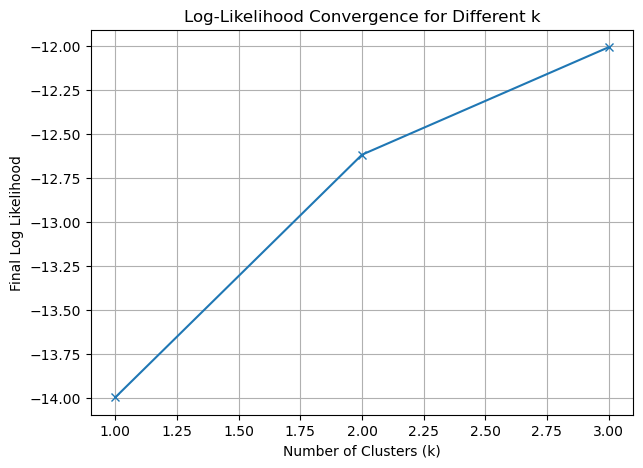

Training Data - Cluster Assignments: [2 0 2 ... 2 2 0]


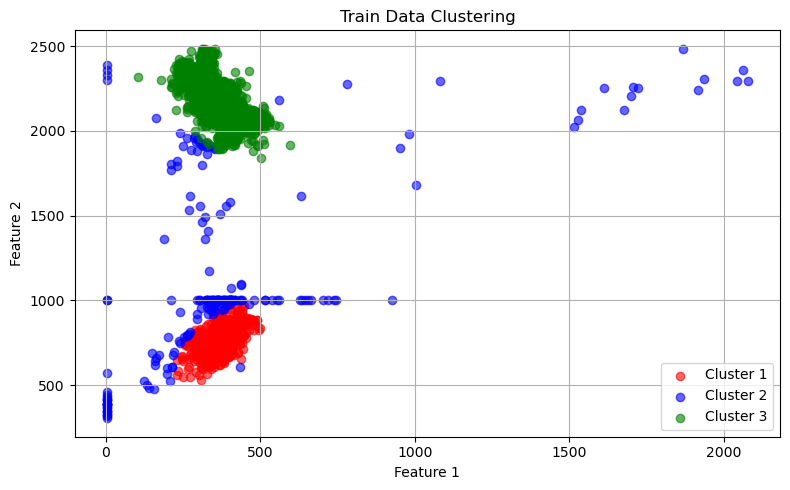

GMM model saved as 'gmm_model.pkl'.


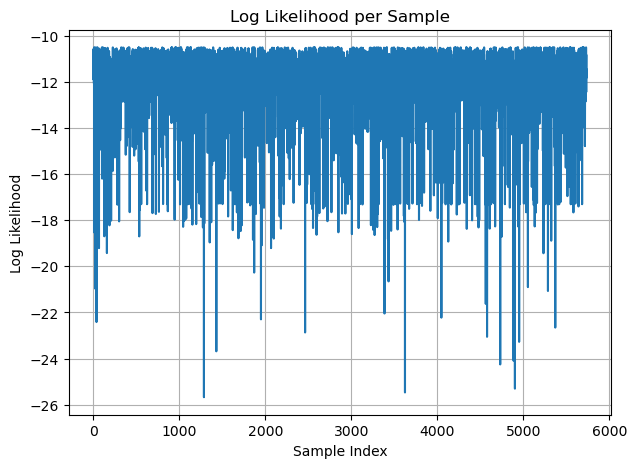

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import joblib

# Load datasets
class1 = pd.read_csv('desktop/internship/dataset/rd_group5/class1.txt', delimiter=' ', header=None)
class2 = pd.read_csv('desktop/internship/dataset/rd_group5/class2.txt', delimiter=' ', header=None)
class3 = pd.read_csv('desktop/internship/dataset/rd_group5/class3.txt', delimiter=' ', header=None)

# Combine datasets into a single array
data = np.vstack([class1.values, class2.values, class3.values])

# Handle missing values by replacing NaN with the mean of each column
imputer = SimpleImputer(strategy='mean')
data = imputer.fit_transform(data)

# Train-test split function
def train_test_split(data, test_size=0.2):
    test_count = int(len(data) * test_size)
    np.random.shuffle(data)
    test_data = data[:test_count]
    train_data = data[test_count:]
    return train_data, test_data

# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2)

# Determine optimal number of clusters using Elbow method (BIC)
scores = []
k_range = range(1, 4)
log_likelihoods = {}

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42, max_iter=100, tol=1e-3, verbose=2)
    gmm.fit(train_data)
    scores.append(gmm.bic(train_data))  # Using BIC score for evaluation
    log_likelihoods[k] = gmm.lower_bound_  # Log-likelihood of final iteration

# Automatically select optimal k based on BIC scores
optimal_k = k_range[np.argmin(scores)]
print(f'Optimal number of clusters: {optimal_k}')

# Fit GMM Model using optimal clusters
gmm = GaussianMixture(n_components=optimal_k, random_state=42, max_iter=100, tol=1e-3, verbose=2)
gmm.fit(train_data)

# Predict cluster assignments for training data
train_clusters = gmm.predict(train_data)

# Calculate silhouette score for training data
silhouette_avg = silhouette_score(train_data, train_clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Plot log-likelihood convergence graph
plt.figure(figsize=(7, 5))
plt.plot(k_range, list(log_likelihoods.values()), marker='x', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Final Log Likelihood')
plt.title('Log-Likelihood Convergence for Different k')
plt.grid(True)
plt.show()

# Plot clusters function
def plot_clusters(data, clusters, title):
    colors = ['red', 'blue', 'green', 'purple', 'orange']
    data = np.array(data)  
    
    # If data is high-dimensional, reduce it to 2D for plotting
    if data.shape[1] > 2:
        pca = PCA(n_components=2)
        data = pca.fit_transform(data)

    plt.figure(figsize=(8, 5))
    for i in range(optimal_k):
        cluster_points = data[clusters == i]
        if cluster_points.size == 0:  
            continue
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i % len(colors)], label=f'Cluster {i+1}', alpha=0.6)

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Output results and plot clusters
print("Training Data - Cluster Assignments:", train_clusters)
plot_clusters(train_data, train_clusters, title='Train Data Clustering')

# Save the trained GMM model to a file
joblib.dump(gmm, 'gmm_model.pkl')
print("GMM model saved as 'gmm_model.pkl'.")

log_likelihoods_per_sample = gmm.score_samples(train_data)

plt.figure(figsize=(7, 5))
plt.plot(range(len(log_likelihoods_per_sample)), log_likelihoods_per_sample)
plt.xlabel('Sample Index')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood per Sample')
plt.grid(True)
plt.show()
import matplotlib.pyplot as plt
import numpy as np  # Import numpy if you don't have it already

# Assuming log_likelihoods is a list or numpy array of log-likelihood values
# Example data (replace with your actual data)
log_likelihoods = gmm.score_samples(train_data)


# Create the plot
plt.figure(figsize=(7, 5))  # Adjust figure size as needed
plt.plot(range(len(log_likelihoods)), log_likelihoods, marker='x', linestyle='-') # Added marker and linestyle
plt.xlabel('Iterations') # Changed to iterations
plt.ylabel('Log Likelihood')
plt.title('Log-Likelihood Convergence') # Changed title
plt.grid(True)
plt.show()


Initialization 0
Initialization converged: True	 time lapse 0.02120s	 ll -13.98813
Initialization 0
Initialization converged: True	 time lapse 0.01745s	 ll -12.60247
Initialization 0
  Iteration 10	 time lapse 0.04272s	 ll change 0.01336
  Iteration 20	 time lapse 0.00917s	 ll change 0.00208
Initialization converged: True	 time lapse 0.05666s	 ll -11.99986
Optimal number of clusters: 3
Initialization 0
  Iteration 10	 time lapse 0.04383s	 ll change 0.01336
  Iteration 20	 time lapse 0.01624s	 ll change 0.00208
Initialization converged: True	 time lapse 0.06194s	 ll -11.99986
Silhouette Score: 0.8148626095516099


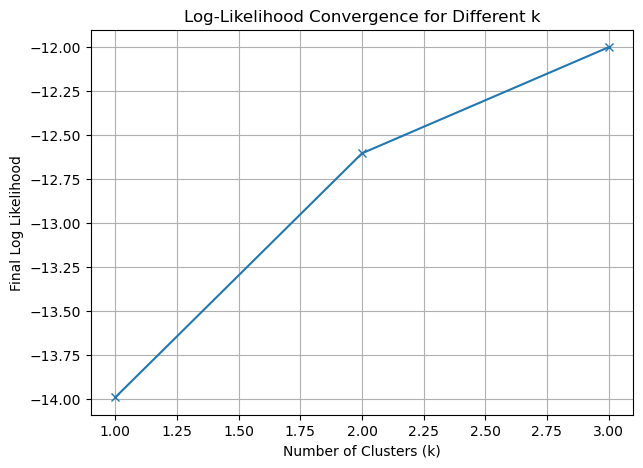

Training Data - Cluster Assignments: [1 1 0 ... 1 1 0]


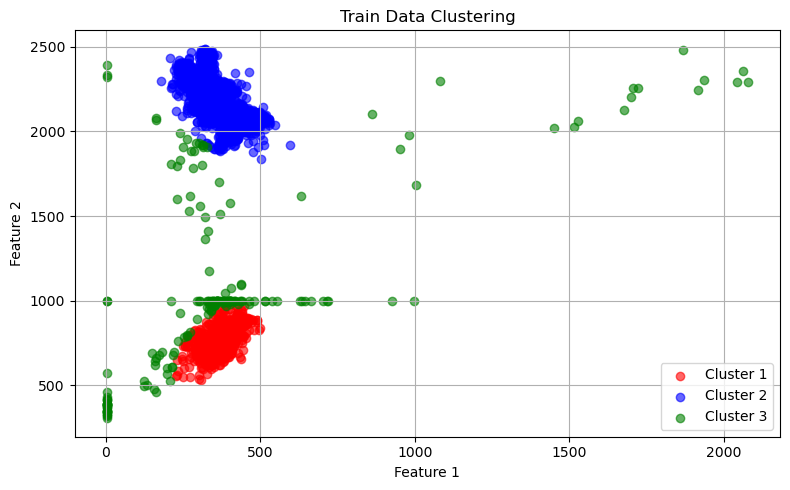

GMM model saved as 'gmm_model.pkl'.


AttributeError: 'GaussianMixture' object has no attribute 'log_likelihoods'

<Figure size 700x500 with 0 Axes>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import joblib

# Load datasets
class1 = pd.read_csv('desktop/internship/dataset/rd_group5/class1.txt', delimiter=' ', header=None)
class2 = pd.read_csv('desktop/internship/dataset/rd_group5/class2.txt', delimiter=' ', header=None)
class3 = pd.read_csv('desktop/internship/dataset/rd_group5/class3.txt', delimiter=' ', header=None)

# Combine datasets into a single array
data = np.vstack([class1.values, class2.values, class3.values])

# Handle missing values by replacing NaN with the mean of each column
imputer = SimpleImputer(strategy='mean')
data = imputer.fit_transform(data)

# Train-test split function
def train_test_split(data, test_size=0.2):
    test_count = int(len(data) * test_size)
    np.random.shuffle(data)
    test_data = data[:test_count]
    train_data = data[test_count:]
    return train_data, test_data

# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2)

# Determine optimal number of clusters using Elbow method (BIC)
scores = []
k_range = range(1, 4)
log_likelihoods = {}

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42, max_iter=100, tol=1e-3, verbose=2)
    gmm.fit(train_data)
    scores.append(gmm.bic(train_data))  # Using BIC score for evaluation
    log_likelihoods[k] = gmm.lower_bound_  # Log-likelihood of final iteration

# Automatically select optimal k based on BIC scores
optimal_k = k_range[np.argmin(scores)]
print(f'Optimal number of clusters: {optimal_k}')

# Fit GMM Model using optimal clusters
gmm = GaussianMixture(n_components=optimal_k, random_state=42, max_iter=100, tol=1e-3, verbose=2)
gmm.fit(train_data)

# Predict cluster assignments for training data
train_clusters = gmm.predict(train_data)

# Calculate silhouette score for training data
silhouette_avg = silhouette_score(train_data, train_clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Plot log-likelihood convergence graph
plt.figure(figsize=(7, 5))
plt.plot(k_range, list(log_likelihoods.values()), marker='x', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Final Log Likelihood')
plt.title('Log-Likelihood Convergence for Different k')
plt.grid(True)
plt.show()

# Plot clusters function
def plot_clusters(data, clusters, title):
    colors = ['red', 'blue', 'green', 'purple', 'orange']
    data = np.array(data)  
    
    # If data is high-dimensional, reduce it to 2D for plotting
    if data.shape[1] > 2:
        pca = PCA(n_components=2)
        data = pca.fit_transform(data)

    plt.figure(figsize=(8, 5))
    for i in range(optimal_k):
        cluster_points = data[clusters == i]
        if cluster_points.size == 0:  
            continue
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i % len(colors)], label=f'Cluster {i+1}', alpha=0.6)

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Output results and plot clusters
print("Training Data - Cluster Assignments:", train_clusters)
plot_clusters(train_data, train_clusters, title='Train Data Clustering')

# Save the trained GMM model to a file
joblib.dump(gmm, 'gmm_model.pkl')
print("GMM model saved as 'gmm_model.pkl'.")

scores = []
k_range = range(1, 4)
for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(train_data)
    scores.append(gmm.bic(train_data))  # Using BIC score for evaluation

plt.figure(figsize=(7, 5))
plt.plot(range(1, len(gmm.log_likelihoods) + 1), gmm.log_likelihoods, marker='x', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Log Likelihood')
plt.title('Log-Likelihood Convergence')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import joblib

# Load datasets
def load_datasets(paths):
    datasets = []
    for path in paths:
        try:
            dataset = pd.read_csv(path, delimiter=' ', header=None)
            datasets.append(dataset.values)
        except Exception as e:
            print(f"Error loading {path}: {e}")
    return datasets

# Combine datasets into a single array
def combine_datasets(datasets):
    return np.vstack(datasets)

# Handle missing values
def handle_missing_values(data):
    imputer = SimpleImputer(strategy='mean')
    return imputer.fit_transform(data)

# Train-test split function
def train_test_split(data, test_size=0.2):
    test_count = int(len(data) * test_size)
    np.random.shuffle(data)
    test_data = data[:test_count]
    train_data = data[test_count:]
    return train_data, test_data

# Determine optimal number of clusters using BIC
def find_optimal_k(train_data, k_range):
    scores = []
    log_likelihoods = {}
    for k in k_range:
        gmm = GaussianMixture(n_components=k, random_state=42, max_iter=100, tol=1e-3, verbose=2)
        gmm.fit(train_data)
        scores.append(gmm.bic(train_data))
        log_likelihoods[k] = gmm.lower_bound_
    optimal_k = k_range[np.argmin(scores)]
    return optimal_k, scores, log_likelihoods

def log_likelihoods(self, X):
        """Compute log-likelihood."""
        log_likelihoods = np.sum(
            np.log(np.sum([self.weights[k] * self.gaussian_pdf(X, self.means[k], self.covariances[k])
                           for k in range(self.n_components)], axis=0))
        )
        return log_likelihoods
# Plot log-likelihood convergence graph
def plot_log_likelihood(k_range, log_likelihoods):
    plt.figure(figsize=(7, 5))
    plt.plot(k_range, list(log_likelihoods.values()), marker='x', linestyle='-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Final Log Likelihood')
    plt.title('Log-Likelihood Convergence for Different k')
    plt.grid(True)
    plt.show()

# Plot clusters function
def plot_clusters(data, clusters, title):
    colors = ['red', 'blue', 'green', 'purple', 'orange']
    data = np.array(data)
    
    if data.shape[1] > 2:
        pca = PCA(n_components=2)
        data = pca.fit_transform(data)

    plt.figure(figsize=(8, 5))
    for i in range(len(np.unique(clusters))):
        cluster_points = data[clusters == i]
        if cluster_points.size == 0:
            continue
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i % len(colors)], label=f'Cluster {i+1}', alpha=0.6)

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    paths = [
        'desktop/internship/dataset/rd_group5/class1.txt',
        'desktop/internship/dataset/rd_group5/class2.txt',
        'desktop/internship/dataset/rd_group5/class3.txt'
    ]
    
    datasets = load_datasets(paths)
    data = combine_datasets(datasets)
    data = handle_missing_values(data)
    
    train_data, test_data = train_test_split(data, test_size=0.2)
    
    k_range = range(1, 4)
    optimal_k, scores, log_likelihoods = find_optimal_k(train_data, k_range)
    print(f'Optimal number of clusters: {optimal_k}')
    
    gmm = GaussianMixture(n_components=optimal_k, random_state=42, max_iter=100, tol=1e-3, verbose=2)
    gmm.fit(train_data)
    
    train_clusters = gmm.predict(train_data)
    silhouette_avg = silhouette_score(train_data, train_clusters)
    print(f'Silhouette Score: {silhouette_avg}')
    
    plot_log_likelihood(k_range, log_likelihoods)
    plot_clusters(train_data, train_clusters, title='Train Data Clustering')
    
    # Save the trained GMM model to a file
    joblib.dump(gmm, 'gmm_model.pkl')
    print("GMM model saved as 'gmm_model.pkl'.")
    
    # Plot log-likelihood convergence for optimal model
    plt.figure(figsize=(7, 5))
    plt.plot(range(1, len(gmm.log_likelihoods) + 1), gmm.log_likelihoods, marker='x', linestyle='-')
    plt.xlabel('Iterations')
    plt.ylabel('Log Likelihood')
    plt.title('Log-Likelihood Convergence')
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Assuming you have your data loaded and preprocessed

# Define the Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_k, random_state=42, max_iter=100, tol=1e-3, verbose=2)

# Fit the model
gmm.fit(train_data)

# Compute the average log-likelihood per sample
avg_log_likelihood = gmm.score(train_data)

# Note: You cannot directly track log-likelihood at each iteration with scikit-learn's GMM.
# However, you can plot the average log-likelihood after fitting as a point.

# To plot the average log-likelihood as a single point (not a convergence plot)
plt.figure(figsize=(7, 5))
plt.scatter(1, avg_log_likelihood, marker='x', linestyle='-')
plt.xlabel('Iteration (After Fitting)')
plt.ylabel('Average Log Likelihood')
plt.title('Average Log Likelihood After Fitting')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming log_likelihoods_per_sample is already calculated
log_likelihoods_per_sample = gmm.score_samples(train_data)

plt.figure(figsize=(7, 5))
plt.plot(range(len(log_likelihoods_per_sample)), log_likelihoods_per_sample)
plt.xlabel('Sample Index')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood per Sample')
plt.grid(True)
plt.show()
